In [1]:
## Feature Scaling and Learning Rate


In [2]:
!python --version

Python 3.9.6


In [3]:
import numpy as np
from common import load_house_data,run_gradient_descent,draw_cost_with_iteration,zscore_normalize
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)

X_train shape: (99, 4)
y_train shape: (99,)


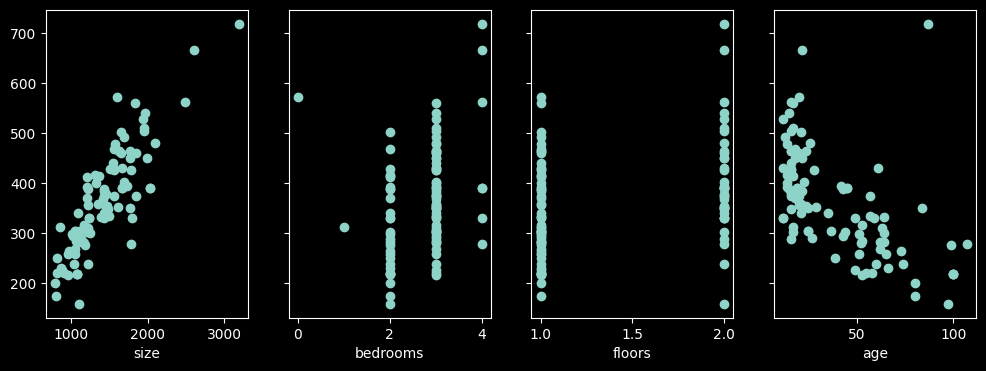

In [4]:
X_train,y_train = load_house_data()

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

x_label = ["size","bedrooms","floors","age"]
# draw
fig,axs = plt.subplots(1,4,figsize=(12,4),sharey=True)

for i in range(len(x_label)):
    axs[i].scatter(X_train[:,i],y_train)
    axs[i].set_xlabel(x_label[i])

plt.show()

Iteration    0: Cost 44231.27
Iteration  100: Cost  1576.04
Iteration  200: Cost  1571.64
Iteration  300: Cost  1567.32
Iteration  400: Cost  1563.08
Iteration  500: Cost  1558.91
Iteration  600: Cost  1554.83
Iteration  700: Cost  1550.81
Iteration  800: Cost  1546.87
Iteration  900: Cost  1543.00
b,w found by gradient descent: 0.00,[ 2.54e-01 -1.66e-04 -5.86e-04 -5.83e-02] 


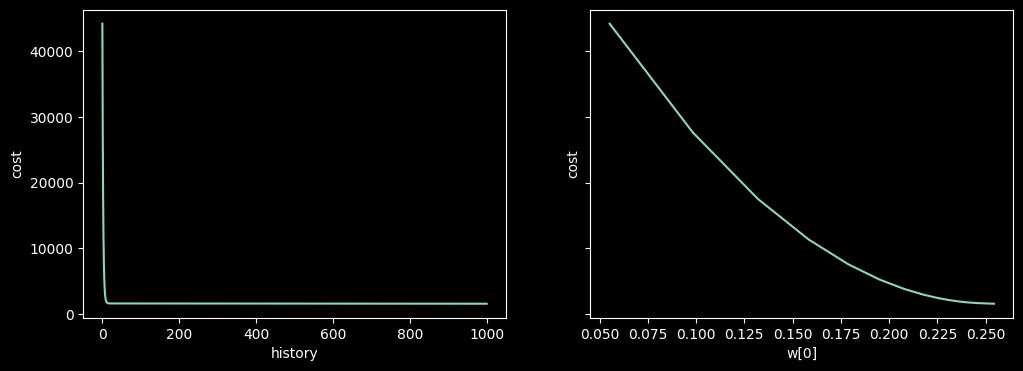

In [5]:
alpha = 1e-7
iterations = 1000

_,_,cost = run_gradient_descent(X_train,y_train,alpha,iterations)

draw_cost_with_iteration(cost)

## Z-score normalization

In [6]:
X_norm, X_mu, X_sigma = zscore_normalize(X_train)

print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

X_mu = [1.42e+03 2.72e+00 1.38e+00 3.84e+01], 
X_sigma = [411.62   0.65   0.49  25.78]
Peak to Peak range by column in Raw        X:[2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to Peak range by column in Normalized X:[5.85 6.14 2.06 3.69]


## after normalize

Iteration    0: Cost 57617.03
Iteration  100: Cost   221.09
Iteration  200: Cost   219.21
Iteration  300: Cost   219.21
Iteration  400: Cost   219.21
Iteration  500: Cost   219.21
Iteration  600: Cost   219.21
Iteration  700: Cost   219.21
Iteration  800: Cost   219.21
Iteration  900: Cost   219.21
b,w found by gradient descent: 363.16,[110.56 -21.27 -32.71 -37.97] 


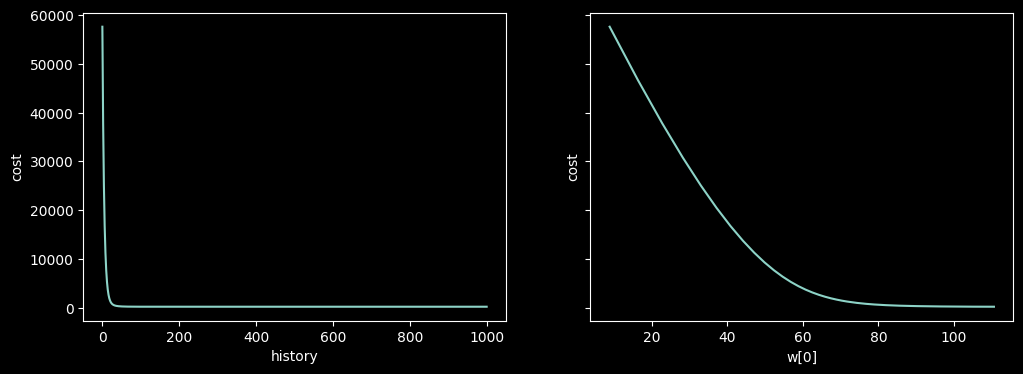

In [10]:
alpha = 1.0e-1
iterations = 1000

w_final,b_final,cost = run_gradient_descent(X_norm,y_train,alpha,iterations)

draw_cost_with_iteration(cost)

In [14]:
# predict
x_house = np.array([1200, 3, 1, 40])
x_house_norm = (x_house - X_mu) / X_sigma

print(x_house_norm)

x_predict = np.dot(x_house_norm,w_final) + b_final
print(f" predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = ${x_predict*1000:0.0f}")

[-0.53  0.43 -0.79  0.06]
 predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = $318709
